Concept
==============


$$
\newcommand{\sumN}{\sum_{n = 1}^N} 
\newcommand{\sumn}{\sum_n} 
\newcommand{\bx}{\mathbf{x}} 
\newcommand{\bbeta}{\boldsymbol{\beta}} 
\newcommand{\btheta}{\boldsymbol{\theta}} 
\newcommand{\bbetahat}{\boldsymbol{\hat{\beta}}} 
\newcommand{\bthetahat}{\boldsymbol{\hat{\theta}}} 
\newcommand{\dadb}[2]{\frac{\partial #1}{\partial #2}} 
\newcommand{\by}{\mathbf{y}} 
\newcommand{\bX}{\mathbf{X}}
\newcommand{\bphi}{\boldsymbol{\phi}}
\newcommand{\bPhi}{\boldsymbol{\Phi}}
$$

## Model Structure

*Linear regression* is a relatively simple method that is extremely widely-used. It is also a great stepping stone for more sophisticated methods, making it a natural algorithm to study first.

In linear regression, the target variable $y$ is assumed to follow a linear function of one or more predictor variables, $x_1, \dots, x_D$, plus some random error. Specifically, we assume the model for the $n^\text{th}$ observation in our sample is of the form 


$$
y_n = \beta_0 + \beta_1 x_{n1} + \dots + \beta_Dx_{nD} + \epsilon_n. 
$$


Here $\beta_0$ is the intercept term, $\beta_1$ through $\beta_D$ are the coefficients on our feature variables, and $\epsilon$ is an error term that represents the difference between the true $y$ value and the linear function of the predictors. Note that the terms with an $n$ in the subscript differ between observations while the terms without (namely the $\beta\text{s}$) do not.

The math behind linear regression often becomes easier when we use vectors to represent our predictors and coefficients. Let's define $\bx_n$ and $\bbeta$ as follows:

$$
\begin{align}
\bx_n &= \begin{pmatrix} 1 & x_{n1} & \dots & x_{nD} \end{pmatrix}^\top \\
\bbeta &= \begin{pmatrix} \beta_0 & \beta_1 & \dots & \beta_D \end{pmatrix}^\top.
\end{align}
$$

Note that $\bx_n$ includes a leading 1, corresponding to the intercept term $\beta_0$. Using these definitions, we can equivalently express $y_n$ as 


$$
y_n = \bbeta^\top \bx_n + \epsilon_n.
$$


Below is an example of a dataset designed for linear regression. The input variable is generated randomly and the target variable is generated as a linear combination of that input variable plus an error term.

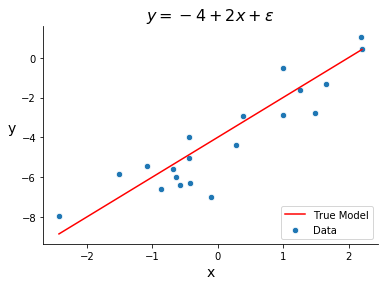

In [327]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# generate data
np.random.seed(123)
N = 20
beta0 = -4
beta1 = 2
x = np.random.randn(N)
e = np.random.randn(N)
y = beta0 + beta1*x + e
true_x = np.linspace(min(x), max(x), 100)
true_y = beta0 + beta1*true_x

# plot
fig, ax = plt.subplots()
sns.scatterplot(x, y, s = 40, label = 'Data')
sns.lineplot(true_x, true_y, color = 'red', label = 'True Model')
ax.set_xlabel('x', fontsize = 14)
ax.set_title(fr"$y = {beta0} + ${beta1}$x + \epsilon$", fontsize = 16)
ax.set_ylabel('y', fontsize=14, rotation=0, labelpad=10)
ax.legend(loc = 4)
sns.despine()

## Parameter Estimation

The previous section covers the entire structure we assume our data follows in linear regression. The machine learning task is then to estimate the parameters in $\bbeta$. These estimates are represented by $\hat{\beta}_0, \dots, \hat{\beta}_D$ or $\bbetahat$. The estimates give us *fitted values* for our target variable, represented by $\hat{y}_n$. 


This task can be accomplished in two ways which, though slightly different conceptually, are identical mathematically. The first approach is through the lens of *minimizing loss*. A common practice in machine learning is to choose a loss function that defines how well a model with a given set of parameter estimates the observed data. The most common loss function for linear regression is squared error loss. This says the *loss* of our model is proportional to the sum of squared differences between the true $y_n$ values and the fitted values, $\hat{y}_n$. We then *fit* the model by finding the estimates $\bbetahat$ that minimize this loss function. This approach is covered in the subsection {doc}`s1/loss_minimization`.


The second approach is through the lens of *maximizing likelihood*. Another common practice in machine learning is to model the target as a random variable whose distribution depends on one or more parameters, and then find the parameters that maximize its likelihood. Under this approach, we will represent the target with $Y_n$ since we are treating it as a random variable. The most common model for $Y_n$ in linear regression is a Normal random variable with mean $E(Y_n) = \bbeta^\top \bx_n$. That is, we assume 

$$
Y_n|\bx_n \sim \mathcal{N}(\bbeta^\top \bx_n, \sigma^2),
$$

and we find the values of $\bbetahat$ to maximize the likelihood. This approach is covered in subsection {doc}`s1/likelihood_maximization`. 


Once we've estimated $\bbeta$, our model is *fit* and we can make predictions. The below graph is the same as the one above but includes our estimated line-of-best-fit, obtained by calculating $\hat{\beta}_0$ and $\hat{\beta}_1$. 

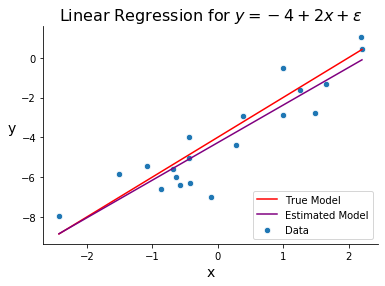

In [328]:
# generate data
np.random.seed(123)
N = 20
beta0 = -4
beta1 = 2
x = np.random.randn(N)
e = np.random.randn(N)
y = beta0 + beta1*x + e
true_x = np.linspace(min(x), max(x), 100)
true_y = beta0 + beta1*true_x

# estimate model 
beta1_hat = sum((x - np.mean(x))*(y - np.mean(y)))/sum((x - np.mean(x))**2)
beta0_hat = np.mean(y) - beta1_hat*np.mean(x)
fit_y = beta0_hat + beta1_hat*true_x

# plot
fig, ax = plt.subplots()
sns.scatterplot(x, y, s = 40, label = 'Data')
sns.lineplot(true_x, true_y, color = 'red', label = 'True Model')
sns.lineplot(true_x, fit_y, color = 'purple', label = 'Estimated Model')
ax.set_xlabel('x', fontsize = 14)
ax.set_title(fr"Linear Regression for $y = {beta0} + ${beta1}$x + \epsilon$", fontsize = 16)
ax.set_ylabel('y', fontsize=14, rotation=0, labelpad=10)
ax.legend(loc = 4)
sns.despine()

## Extensions of Ordinary Linear Regression

There are many important extensions to linear regression which make the model more flexible. Those include {doc}`/content/c2/s1/regularized`—which balances the bias-variance tradeoff for high-dimensional regression models—{doc}`/content/c2/s1/bayesian`—which allows for prior distributions on the coefficients—and {doc}`/content/c2/s1/GLMs`—which introduce non-linearity to regression models. These extensions are discussed in the next chapter.